# Final models comparison and summary

### Dependencies loading

In [32]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 150)

# np.random.seed(1916) #uncomment if you want your code to be reproducible; for the purposes of our activity, let's add some randomness to the results

### Final models comparison

Now we have to use our 6 models to score our test set!

#### Naive Model

In case of Naive Model we have already scored our test set!

In [33]:
naive_model_score = pd.read_csv("../data/models_output/naive.csv", index_col = 0)

In [34]:
naive_model_score.rename(index={0: 'naive_model'},inplace=True)

In [35]:
naive_model_score

,RMSE,MAE
naive_model,0.16786,0.091059


#### OLS

In [36]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [37]:
X = ['adv_cat_(874.5, inf]', 'diff_positive', 'str_cat_(0.0875, 0.192]', 'ta_log', 'WB_GDPpc', 'txt_cat_(0.488, 24.415]', 'txt_cat_(-34.811, 0.488]', 'gielda_2', 'ppe_clip', 'revenue_cat_(1248.817, 4233.587]', 'revenue_cat_(4233.587, inf]', 'pi_cat_(8108.5, inf]', 'revenue_cat_(0.174, 1248.817]', 'roa_clip', 'pi_cat_(-8975.0, -1.523]', 'pi_cat_(157.119, 465.9]', 'pi_cat_(465.9, 7875.5]', 'pi_cat_(-1.523, 157.119]']

In [38]:
model = pickle.load(open("../models/ols.sav", 'rb'))

In [39]:
y_pred = model.predict(df_test.loc[:,X].values)

In [40]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ols_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 1000x500 with 0 Axes>

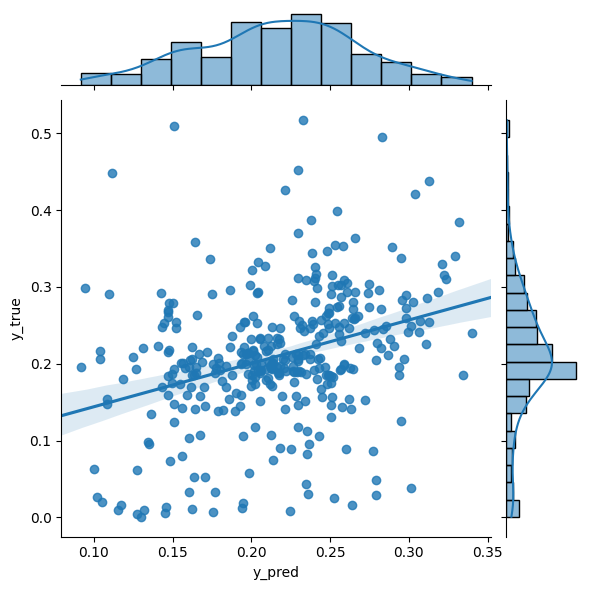

In [41]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(
    data=comp,
    x="y_pred",
    y="y_true",
    kind="reg",
    truncate=False,
)



In [42]:
ols_model_score.rename(index={0: 'ols_model'},inplace=True)

In [43]:
ols_model_score

,RMSE,MAE
ols_model,0.085129,0.061867


#### ARMA

In case of ARMA we have already scored our test set!

In [44]:
arma_model_score = pd.read_csv("../data/models_output/arma.csv", index_col = 0)

In [45]:
arma_model_score.rename(index={0: 'arma_model'},inplace=True)

In [46]:
arma_model_score

,RMSE,MAE
arma_model,0.115057,0.073336


#### ARDL

In [47]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [48]:
X = ['sale', 'cfc', 'txt_cat_(-34.811, 0.488]', 'txt_cat_(0.488, 24.415]',
       'txt_cat_(308.55, 327.531]', 'pi_cat_(7875.5, 8108.5]',
       'str_cat_(0.28, inf]', 'dlc_cat_(176.129, 200.9]', 'diff_positive',
       'etr_y_ma']

In [49]:
model = pickle.load(open("../models/ardl.sav", 'rb'))

In [50]:
y_pred = model.predict(df_test.loc[:,X].values)

In [51]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
ardl_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 1000x500 with 0 Axes>

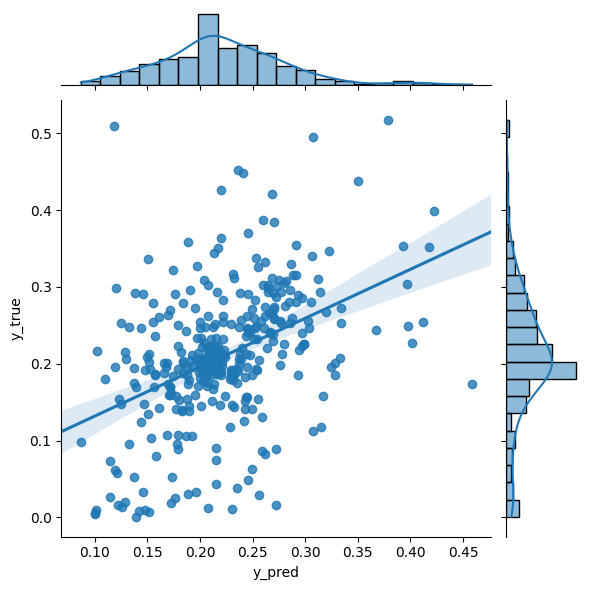

In [52]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(
    data=comp,
    x="y_pred",
    y="y_true",
    kind="reg",
    truncate=False,
)


In [53]:
ardl_model_score.rename(index={0: 'ardl_model'},inplace=True)

In [54]:
ardl_model_score

,RMSE,MAE
ardl_model,0.082121,0.05862


#### KNN

In [55]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [56]:
X = ['ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'cfc', 'dta', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [57]:
scaler = pickle.load(open("../models/minmaxscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [58]:
model = pickle.load(open("../models/knn.sav", 'rb'))

In [59]:
y_pred = model.predict(df_test.loc[:,X].values)
y_pred

array([0.15381768, 0.14548521, 0.36528674, 0.16766692, 0.18747688,
       0.20035358, 0.19752034, 0.20237613, 0.39314654, 0.19300135,
       0.33345822, 0.3296713 , 0.28701783, 0.09736033, 0.26823414,
       0.28654306, 0.3241411 , 0.30037981, 0.29695114, 0.47406234,
       0.07206431, 0.17674928, 0.09264793, 0.12225917, 0.18816236,
       0.20352299, 0.10736068, 0.12256565, 0.17945494, 0.34148471,
       0.18061057, 0.33542907, 0.09570639, 0.15555886, 0.2491224 ,
       0.3027646 , 0.49428015, 0.19197748, 0.232559  , 0.18817675,
       0.28471094, 0.21752146, 0.19842386, 0.17789764, 0.17756358,
       0.29387459, 0.34024142, 0.10459147, 0.20729895, 0.33207707,
       0.3157007 , 0.28489943, 0.27884077, 0.25935849, 0.39578361,
       0.23638513, 0.18821065, 0.19634532, 0.16314053, 0.20292084,
       0.16481602, 0.22349722, 0.16935729, 0.3275025 , 0.16886608,
       0.23720305, 0.18902764, 0.15396119, 0.11922853, 0.11875531,
       0.18391152, 0.30255954, 0.23092748, 0.20505301, 0.47802

In [60]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
knn_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

<Figure size 1000x500 with 0 Axes>

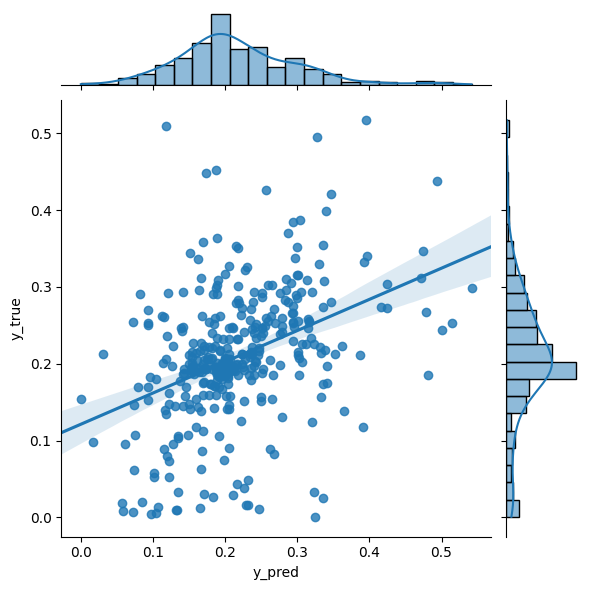

In [61]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(
    data=comp,
    x="y_pred",
    y="y_true",
    kind="reg",
    truncate=False,
)


In [62]:
knn_model_score.rename(index={0: 'knn_model'},inplace=True)

In [63]:
knn_model_score

,RMSE,MAE
knn_model,0.094528,0.06713


#### SVR

In [64]:
df_train = pd.read_csv("../data/output/train_fe.csv", index_col=0)
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)

In [65]:
X = ['ta', 'pi', 'str', 'xrd', 'dlc', 'capex', 'revenue', 'cce', 'diff', 'sale', 'cash_holdings', 'capex2', 'cfc', 'capex2_scaled', 'WB_GDPpc', 'rr_per_country', 'rr_per_sector', 'sektor_consumer discretionary', 'sektor_consumer staples', 'sektor_energy', 'sektor_health care', 'sektor_industrials', 'sektor_materials', 'sektor_real estate', 'gielda_2', 'gielda_3', 'xrd_exists', 'ni_profit', 'ni_profit_20000', 'diff_positive', 'lev_sqrt', 'etr_y_ma', 'lev_ma', 'lev_past', 'sale_past', 'cash_holdings_past']
standardization = ['rok', 'ta', 'txt', 'pi', 'str', 'xrd', 'ni', 'ppent', 'intant', 'dlc', 'dltt', 'capex', 'revenue', 'cce', 'adv', 'diff', 'roa', 'lev', 'intan', 'rd', 'ppe', 'sale', 'cash_holdings', 'adv_expenditure', 'capex2', 'capex2_scaled', 'y_v2x_polyarchy', 'WB_GDPgrowth', 'WB_GDPpc', 'WB_Inflation', 'rr_per_country', 'rr_per_sector', 'ta_log', 'ppent_sqrt', 'intant_sqrt', 'roa_clip', 'lev_sqrt', 'intan_pow2', 'rd_sqrt', 'ppe_clip', 'cash_holdings_sqrt', 'diff_dta', 'etr_y_past', 'etr_y_ma', 'diff_ma', 'roa_ma', 'lev_ma', 'intan_ma', 'ppe_ma', 'sale_ma', 'cash_holdings_ma', 'roa_past', 'lev_past', 'intan_past', 'ppe_past', 'sale_past', 'cash_holdings_past', 'y_e_p_polity']

In [66]:
scaler = pickle.load(open("../models/standardscaler.sav", 'rb'))
df_test[standardization] = scaler.transform(df_test[standardization])

In [67]:
model = pickle.load(open("../models/svr.sav", 'rb'))

In [68]:
y_pred = model.predict(df_test.loc[:,X].values)
y_pred

array([0.17668105, 0.1099839 , 0.19304401, 0.18393249, 0.19956444,
       0.19588916, 0.23362412, 0.18286352, 0.2050993 , 0.19317103,
       0.19680466, 0.27142436, 0.25481426, 0.08991978, 0.23206738,
       0.21523407, 0.12471224, 0.1818117 , 0.25002289, 0.27866626,
       0.12881545, 0.17518477, 0.14087601, 0.12158173, 0.15920239,
       0.15542808, 0.09699669, 0.14030866, 0.14925602, 0.19346497,
       0.14779996, 0.13267745, 0.21127354, 0.23372432, 0.18853288,
       0.24154894, 0.28958016, 0.15617395, 0.23073439, 0.22204603,
       0.24825327, 0.19117821, 0.20221433, 0.17860313, 0.14787615,
       0.18415523, 0.19759424, 0.1126661 , 0.22524472, 0.21071615,
       0.24480682, 0.27060168, 0.23109595, 0.23829986, 0.20059204,
       0.2212357 , 0.13525849, 0.18045631, 0.18470494, 0.19476799,
       0.18412958, 0.15269507, 0.16928199, 0.20976837, 0.23642029,
       0.21593193, 0.15305128, 0.1775398 , 0.10214891, 0.10630933,
       0.18459002, 0.26944224, 0.20505515, 0.20107556, 0.22876

In [69]:
y_true = df_test.etr.tolist()
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
svr_model_score = pd.DataFrame([rmse, mae]).T.rename(columns ={0:"RMSE", 1:"MAE"})

In [70]:
comp

,y_pred,y_true
0,0.153818,0.214678
1,0.145485,0.169561
2,0.365287,0.138719
3,0.167667,0.262670
4,0.187477,0.451843
...,...,...
358,0.221747,0.262860
359,0.101142,0.057970
360,0.346505,0.420331
361,0.183279,0.290330


<Figure size 1000x500 with 0 Axes>

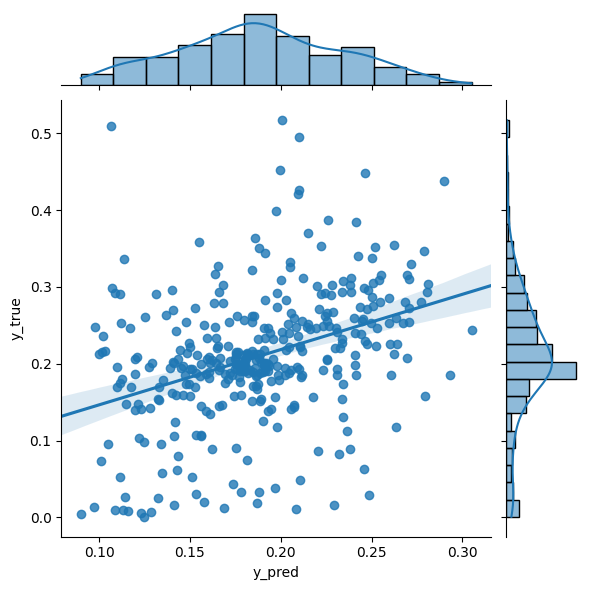

In [71]:
comp = pd.DataFrame([y_pred, y_true]).rename({0:"y_pred", 1:"y_true"}).T
plt.figure(figsize=(10, 5))
sns.jointplot(
    data=comp,
    x="y_pred",
    y="y_true",
    kind="reg",
    truncate=False,
)


In [72]:
svr_model_score.rename(index={0: 'svr_model'},inplace=True)

In [73]:
svr_model_score

,RMSE,MAE
svr_model,0.084485,0.061772


### Final comparison and summary

In [74]:
final_comparison = pd.concat([naive_model_score, ols_model_score, arma_model_score, ardl_model_score, knn_model_score, svr_model_score])

In [75]:
final_comparison.sort_values("RMSE")

,RMSE,MAE
ardl_model,0.082121,0.058620
svr_model,0.084485,0.061772
ols_model,0.085129,0.061867
knn_model,0.094528,0.067130
arma_model,0.115057,0.073336
naive_model,0.167860,0.091059


In [76]:
final_comparison.rename({"knn_model":"KNN", "svr_model":"SVR", "ardl_model":"ARDL", "ols_model":"OLS", "arma_model":"ARMA", "naive_model":"NAIVE MODEL"},inplace=True)

In [77]:
final_comparison = final_comparison.round(6)

In [78]:
final_comparison

,RMSE,MAE
NAIVE MODEL,0.167860,0.091059
OLS,0.085129,0.061867
ARMA,0.115057,0.073336
ARDL,0.082121,0.058620
KNN,0.094528,0.067130
SVR,0.084485,0.061772


[]

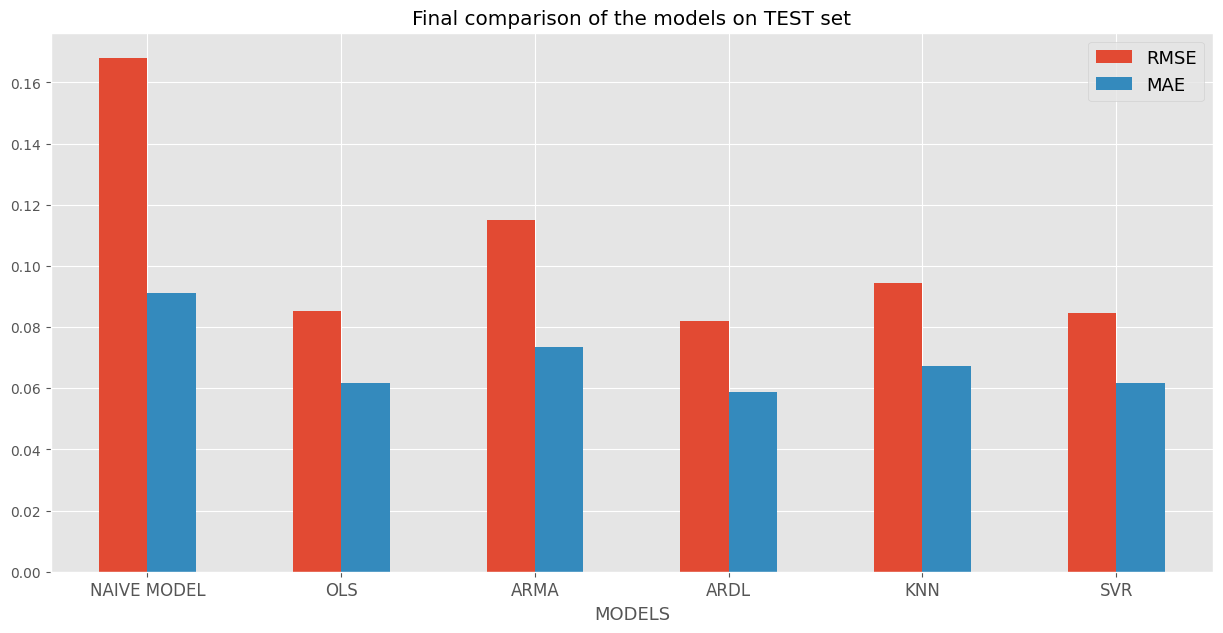

In [79]:
plt.style.use('ggplot')
ax = final_comparison.plot(kind='bar', figsize=(15, 7), title="Final comparison of the models on TEST set")
ax.legend(fontsize=13)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True, ) # labels along the bottom edge are off
ax.set_xticklabels(final_comparison.index, rotation=0, fontsize=12)
ax.set_xlabel("MODELS", fontsize=13)
ax.plot()

And the winner is: **ARDL**, but we see that OLS and SVR were very close.

#### Final summary

Based on final scores we see that: 
 * naive model ($y_t = y_{t-1}$) have been  beaten by all models
 * ARMA approach without additional exogenous variables was better than naive model
 * OLS approach without additional time-related exogenous variables was better than naive model
 * when we combined both approaches: static exogenous variables + time-related exogenous variables in ARDL model we obtained better model!
 * SVR and KNN are weaker than econometric approaches

**To be honest in most cases in the business environment for sure we will chose ARDL: cheaper - computational time; fully explainable and has less variables!**

             RMSE       MAE
rf_model  0.07732  0.052848
              RMSE       MAE
dt_model  0.081297  0.057009
                   RMSE       MAE
elastic_model  0.082879  0.058003
                   RMSE       MAE
Random Forest  0.077320  0.052848
Decision Tree  0.081297  0.057009
ARDL           0.082121  0.058620
Elastic Net    0.082879  0.058003
SVR            0.084485  0.061772
OLS            0.085129  0.061867
KNN            0.094528  0.067130
ARMA           0.115057  0.073336
NAIVE          0.167860  0.091059


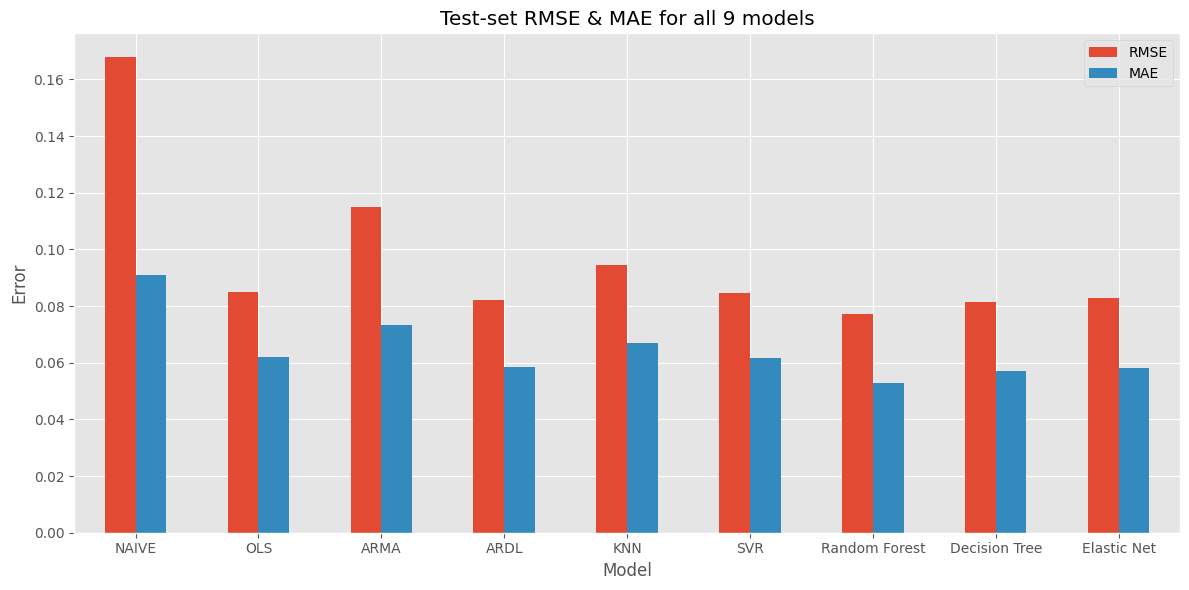

In [ ]:
df_test = pd.read_csv("../data/output/test_fe.csv", index_col=0)
y_true  = df_test.etr

from sklearn.metrics       import mean_squared_error, mean_absolute_error
import pickle, numpy as np, pandas as pd

# utility to pull out exactly the features each pipeline was trained on
def get_pipeline_features(pipe):
    # scikit-learn stores feature names on the first transformer that sees them
    if hasattr(pipe, "feature_names_in_"):
        return pipe.feature_names_in_
    if "sc" in pipe.named_steps:
        return pipe.named_steps["sc"].feature_names_in_
    # fallback to model step
    return pipe.named_steps["model"].feature_names_in_

rf = pickle.load(open("../models/rf.sav", "rb"))
feats_rf = get_pipeline_features(rf)
y_pred_rf = rf.predict(df_test[feats_rf])
rf_rmse = np.sqrt(mean_squared_error(y_true, y_pred_rf))
rf_mae  = mean_absolute_error(y_true, y_pred_rf)
rf_score = pd.DataFrame([[rf_rmse, rf_mae]],
                        index=["rf_model"],
                        columns=["RMSE","MAE"])
print(rf_score)

dt = pickle.load(open("../models/dt.sav", "rb"))
feats_dt = get_pipeline_features(dt)
y_pred_dt = dt.predict(df_test[feats_dt])
dt_rmse = np.sqrt(mean_squared_error(y_true, y_pred_dt))
dt_mae  = mean_absolute_error(y_true, y_pred_dt)
dt_score = pd.DataFrame([[dt_rmse, dt_mae]],
                        index=["dt_model"],
                        columns=["RMSE","MAE"])
print(dt_score)

en = pickle.load(open("../models/elastic.sav", "rb"))
feats_en = get_pipeline_features(en)
y_pred_en = en.predict(df_test[feats_en])
en_rmse = np.sqrt(mean_squared_error(y_true, y_pred_en))
en_mae  = mean_absolute_error(y_true, y_pred_en)
en_score = pd.DataFrame([[en_rmse, en_mae]],
                        index=["elastic_model"],
                        columns=["RMSE","MAE"])
print(en_score)

final_comparison = pd.concat([
    naive_model_score,
    ols_model_score,
    arma_model_score,
    ardl_model_score,
    knn_model_score,
    svr_model_score,
    rf_score,
    dt_score,
    en_score
])

final_comparison = final_comparison.rename(index={
    "knn_model":"KNN",
    "svr_model":"SVR",
    "ardl_model":"ARDL",
    "ols_model":"OLS",
    "arma_model":"ARMA",
    "naive_model":"NAIVE",
    "rf_model":"Random Forest",
    "dt_model":"Decision Tree",
    "elastic_model":"Elastic Net"
}).round(6)

print(final_comparison.sort_values("RMSE"))

import matplotlib.pyplot as plt
plt.style.use('ggplot')
ax = final_comparison.plot(
    kind='bar', figsize=(12,6),
    title="Test-set RMSE & MAE for all 9 models"
)
ax.set_xlabel("Model")
ax.set_ylabel("Error")
ax.legend(loc='best')
plt.xticks(rotation=0)
plt.tight_layout()


Random Forest Performs the best!